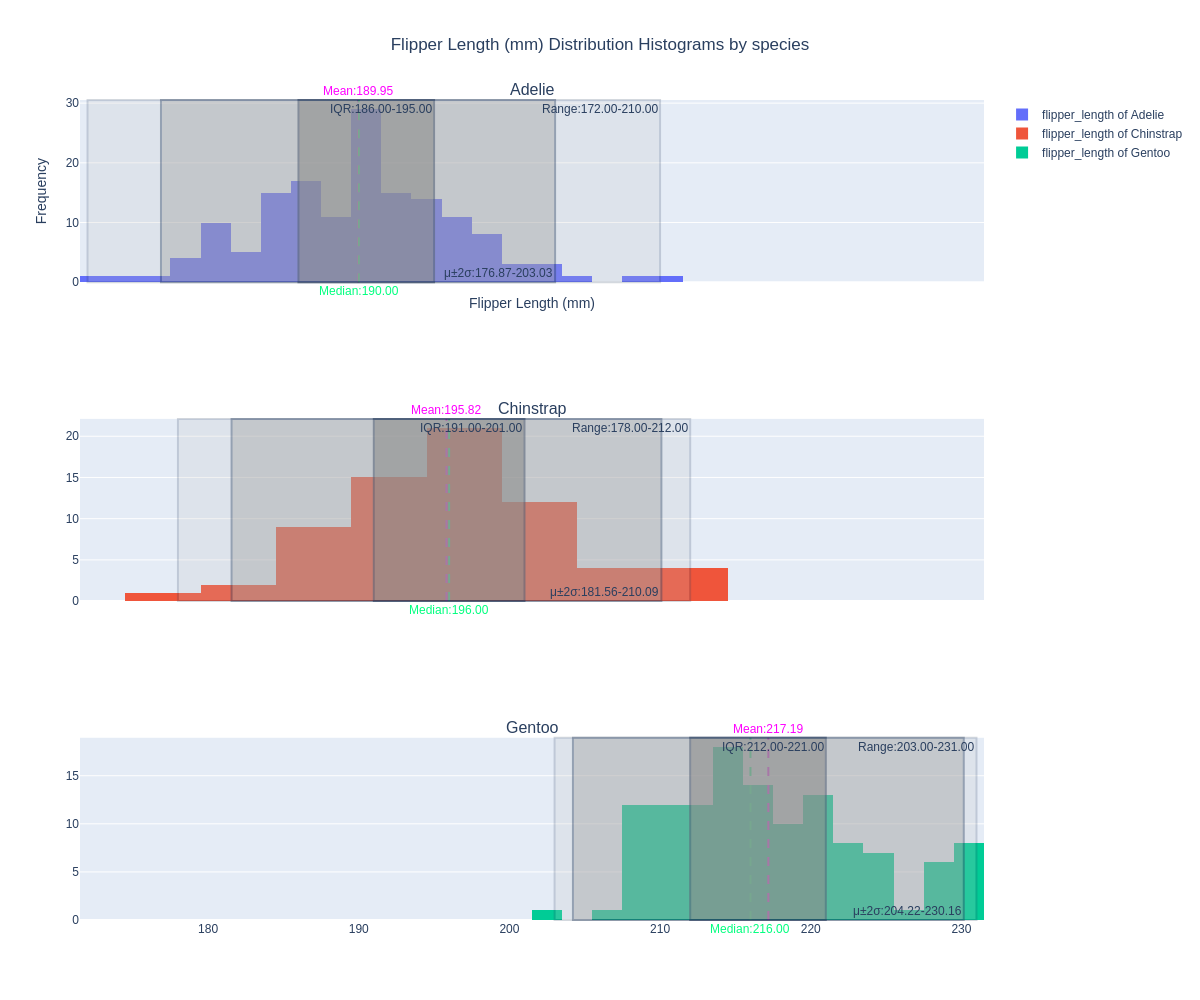

In [17]:
# 1.It is written by myself based on the link provided in HW, so no chatbot session history provided.
import pandas as pd
import plotly.subplots as sp
import plotly.graph_objects as go

pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
species = pingees.groupby("species")
figs = sp.make_subplots(rows=3,
                        cols=1,
                        shared_xaxes=True,
                        shared_yaxes=True,
                        subplot_titles=pingees['species'].unique()
                        )
for i, (name, group) in enumerate(species):
    flipper_length = group['flipper_length_mm']

    fig = go.Histogram(x=flipper_length,
                       name=f'flipper_length of {name}'
                       )

    figs.add_trace(fig,
                   row=i+1,
                   col=1
                   )

    μ = flipper_length.mean()

    figs.add_vline(μ,
                   annotation_text=f'Mean:{μ:.2f}',
                   annotation_position='top',
                   annotation_font_color='#FF00FF',
                   line_dash='dash',
                   line_color='#FF00FF',
                   row=i+1,
                   col=1
                   )

    med = flipper_length.median()

    figs.add_vline(flipper_length.median(),
                   annotation_text=f'Median:{med:.2f}',
                   annotation_position='bottom',
                   annotation_font_color='#00FF7F',
                   line_dash='dash',
                   line_color='#00FF7F',
                   row=i+1,
                   col=1
                   )

    min_, max_ = flipper_length.min(), flipper_length.max()

    figs.add_vrect(min_,
                   max_,
                   annotation_text=f'Range:{min_:.2f}-{max_:.2f}',
                   annotation_position='top right',
                   fillcolor='#C0C0C0',
                   opacity=0.2,
                   row=i+1,
                   col=1
                   )
    
    q1, q3 = flipper_length.quantile(0.25), flipper_length.quantile(0.75)
    figs.add_vrect(q1,
                   q3,
                   annotation_text=f'IQR:{q1:.2f}-{q3:.2f}',
                   annotation_position='top right',
                   fillcolor='#808080',
                   opacity=0.6,
                   row=i+1,
                   col=1
                   )

    σ = flipper_length.std()

    figs.add_vrect(μ-2*σ,
                   μ+2*σ,
                   annotation_text=f'μ±2σ:{μ-2*σ:.2f}-{μ+2*σ:.2f}',
                   annotation_position='bottom right',
                   fillcolor='#A0A0A0',
                   opacity=0.4,
                   row=i+1,
                   col=1
                   )

figs.update_layout(height=1000,
                   width=1200,
                   title_text="Flipper Length (mm) Distribution Histograms by species",
                   title_x=0.5,
                   xaxis_title="Flipper Length (mm)",
                   yaxis_title="Frequency"
                  )

figs.show(renderer="png")

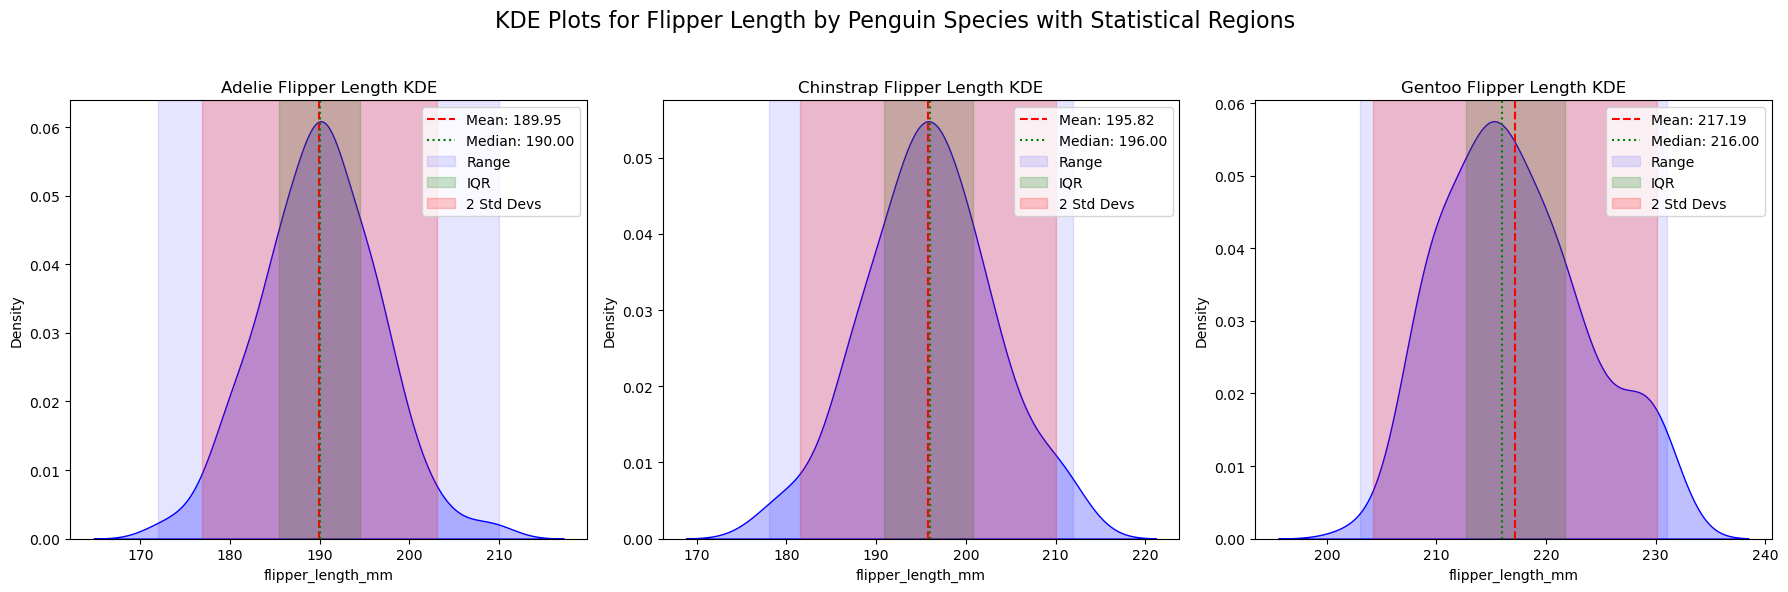

In [10]:
#2 link: https://chatgpt.com/share/66f0a87f-cbb0-8002-9c04-c62548fb4ef2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Filter out rows with missing 'flipper_length_mm' data
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Set up species groups
species_list = penguins['species'].unique()

# Function to get basic statistics for each species
def get_stats(data, column):
    mean = data[column].mean()
    median = data[column].median()
    min_val = data[column].min()
    max_val = data[column].max()
    std = data[column].std()
    iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    range_std = (mean - 2 * std, mean + 2 * std)
    return mean, median, min_val, max_val, iqr, range_std

# Set up the figure for three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop over each species and create the KDE plots
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]
    
    # Calculate statistics
    mean, median, min_val, max_val, iqr, range_std = get_stats(species_data, 'flipper_length_mm')
    
    # Plot KDE for flipper length
    sns.kdeplot(species_data['flipper_length_mm'], fill=True, ax=axes[i], color="blue")
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    axes[i].axvline(median, color='green', linestyle=':', label=f'Median: {median:.2f}')
    
    # Add shaded regions for range, IQR, and 2 standard deviations
    # Range (min to max)
    axes[i].axvspan(min_val, max_val, alpha=0.1, color='blue', label='Range')
    
    # IQR
    axes[i].axvspan(mean - iqr / 2, mean + iqr / 2, alpha=0.2, color='green', label='IQR')
    
    # 2 Standard deviations away from the mean
    axes[i].axvspan(range_std[0], range_std[1], alpha=0.2, color='red', label='2 Std Devs')
    
    # Title and legend
    axes[i].set_title(f'{species} Flipper Length KDE')
    axes[i].legend()

# Adjust layout and show the figure
plt.suptitle('KDE Plots for Flipper Length by Penguin Species with Statistical Regions', fontsize=16)
plt.tight_layout(rect=(0, 0, 1, 0.95))
plt.show()


#3.
link: https://chatgpt.com/share/66f0a87f-cbb0-8002-9c04-c62548fb4ef2
Summary of Our Interaction:
Initial Task (Seaborn KDE Plot with Plotly Histogram Overlays):

You requested assistance on using Seaborn’s Kernel Density Estimation (KDE) plots to mark mean, median, range, interquartile range (IQR), and two standard deviations for the flipper_length_mm feature in the penguins dataset. The task also required combining this with Plotly histograms for each species.
We explored using Seaborn’s KDE plots along with Plotly subplots to generate histograms, including vertical lines for mean and median and regions for IQR, range, and 2 standard deviations.
After some debugging related to vertical lines and regions displaying incorrectly at the bottom, we adjusted the scaling to ensure the regions and lines scaled to the full y-axis height, improving the visualization.
Problem with Regions and Lines in Plotly:

Initially, the lines and shaded regions representing statistical measures (mean, median, IQR, etc.) appeared at the bottom of the figures due to y-axis scaling issues.
We resolved this by calculating the maximum histogram height and adjusting the regions (y1) dynamically based on the actual heights of the histogram to ensure that lines and shaded regions extended properly across the plot.
Rewriting Task Using Seaborn KDE:

You then requested a similar task but using Seaborn KDE plots exclusively (without Plotly histograms).
I helped create Seaborn KDE plots for flipper_length_mm, organized in a row of three subplots (one for each penguin species), and highlighted the statistical regions:
Mean and median were marked with vertical lines.
Shaded regions were used to mark the range (min to max), IQR, and 2 standard deviations away from the mean.
Discussion on Data Visualization Types:

You asked for an evaluation of whether box plots, histograms, and KDEs effectively represent data spread.
We discussed:
Box plots are great for summarizing central tendencies and spread (range, IQR, median), but they don’t show distribution shape.
Histograms represent data spread well, especially when analyzing frequency distribution across subcategories, but are sensitive to bin size.
KDE plots provide a smoothed, continuous view of the data’s distribution, making it easier to analyze quantitatively compared to histograms.
Conclusion:

We successfully developed visualizations with KDEs, subplots, and statistical annotations for the penguin dataset. You now have clear comparisons between Seaborn KDE plots and other plot types, particularly in terms of how well they show data spread.

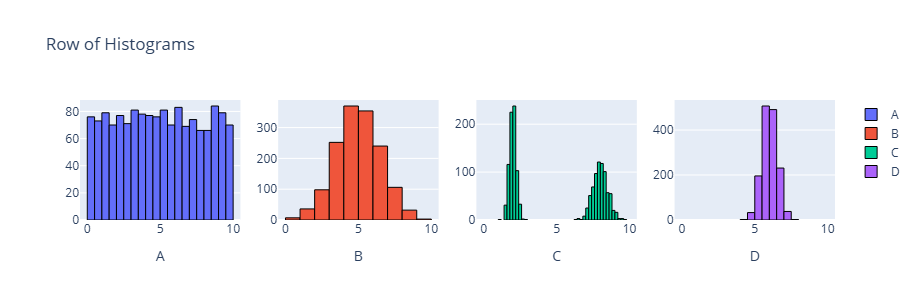

In [18]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")

1. A and C has similar means and varience
2. AB and BC has similar means but different varience
3. BD has similar varience but different mean
4. AD and CD has different mean and different varience
   by looking code and mathematics
   for A, μ=5
   A = Uni(0,10) f(x)=1.0 for 0 < x < 10, 0 o/w
   E(x) = integration of xf(x) with respect to x
   E(x) = 5
   E(x^2)-5*5 = 25/3 = Var(A)
   for B, μ=5, Var(B)= 1.5
   for C, μ= 2/2 + 8/2 = 5, Intuitively, Var(C) > Var(A) >> Var(B) > Var(D), IDK how to calculate varience of 2 PDF(not 2 normal distribution! obviously not 0.25+0.5=0.75), but I can use computer to do Monte Carlo method to know it is about 9
   for D, μ=6, Var(D)=0.5
N/A| A | B | C | D
 μ | 5 | 5 | 5 | 6
Var|8.3|1.5| 9 |0.5